# Approximation of EE wave solution vs LAL simulated signal

Going back to the simulated signal.\
Now we can compare the simulated wave behaviour against what can be predicted by the equations obtained by combining the linearization of Einstein's equations $\oplus$ large wavelenght approximation $\oplus$ Kepler laws\
We begin defining the useful equations

In [29]:
import pandas as pd
import numpy as np
# Use a raw string or double backslashes for the path
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\Others\GW-signals\simulated.txt"  # Use the correct path to your file

# Read the file
data = pd.read_csv(file_path, sep="\t", header=0, names=["time", "h_+", "h_x"])

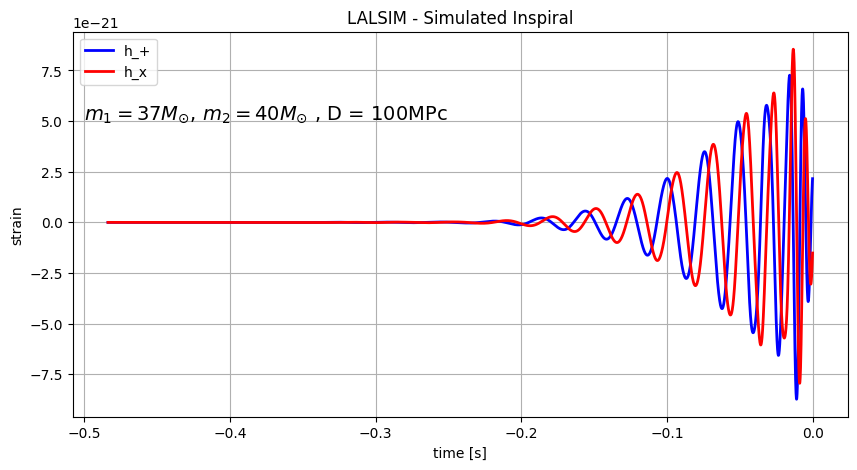

In [173]:
import matplotlib.pyplot as plt


fig, _ = plt.subplots(figsize=(10,5))
plt.plot(data['time'].values[data['time'].values<0],data['h_+'].values[data['time'].values<0], label='h_+', color='blue', linewidth=2)
plt.plot(data['time'].values[data['time'].values<0],data['h_x'].values[data['time'].values<0], label='h_x', color='red', linewidth=2)
plt.xlabel('time [s]')
plt.ylabel('strain')
plt.grid()
plt.title('LALSIM - Simulated Inspiral')
plt.text(-.5,5.1*1e-21, r"$m_{1}=37 M_{\odot}$, $m_{2}=40M_{\odot}$ , D = 100MPc", fontsize=14)
plt.legend()

For now we are interested only in the $+$ polarization of the signal \
\
$ h_{+}(t) = \frac{4\mathcal{G}\mathcal{M_c}}{c^2 D}\left(\pi f(t)\right)^{\frac{2}{3}} \cos(\phi(t)) $ \
\
$f(t) = \frac{1}{8\pi} \left(\frac{c^3}{\mathcal{G}\mathcal{M_c}}\right)^{\frac{5}{8}}\left(5(t-t_c)\right)^{-\frac{3}{8}} $ \
\
$\phi(t) = -\frac{1}{16} \left(\frac{c^3}{G\mathcal{M_c}}\right)^{\frac{5}{8}}(5(t-t_c))^{\frac{5}{8}} + \phi_o$ \
\
$t_c = \frac{5}{256} \frac{c^5}{G^4} \frac{a_0^{4}}{\mu M^2}$

In [149]:
from astropy import constants as cnst
from astropy import units as u

In [ ]:
# Constants
G = cnst.G.cgs.value  # Gravitational constant (cm^3/g/s^2)
c = cnst.c.cgs.value  # Speed of light (cm/s)
msun = cnst.M_sun.cgs.value  # Solar mass (g)

# Binary Black Hole Parameters
m1 = 37 * msun  # Mass of first BH
m2 = 40 * msun  # Mass of second BH
M = m1 + m2  # Total mass
mu = (m1 * m2) / M  # Reduced mass

# Chirp Mass
Mc = mu ** (3/5) * M ** (2/5)  # Chirp mass in g

# Luminosity distance (100 Mpc)
D = (100 * cnst.Mpc).cgs.value  # Convert to cm

In [179]:
# Precompute Constants
Mchirp_term = (G * Mc / c**3) ** (-5/8)
coeff_freq = (1 / (8 * np.pi)) * Mchirp_term
coeff_phase = (-1 / 16) * Mchirp_term
coeff_hplus = (4 * G * Mc / (c**2 * D))

In [188]:
# Time Values: From -tc to 0
tc = 1.0  # Coalescence time (arbitrary unit)
t_values = np.linspace(-tc, -1e-3, 1000)  # Avoid singularity at t=0


In [189]:
# Compute GW Frequency
dt = np.abs(t_values)  # (t - tc) should be positive
f_values = (1 / (8 * np.pi)) * (c**3 / (G * Mc))**(5/8) * dt**(-3/8)  # Hz

# Compute GW Phase
phi_values = (-1 / 16) * (c**3 / (G * Mc))**(5/8) * dt**(5/8)  # radians

# Compute GW Strain
h_values = (4 * G * Mc / (c**2 * D)) * (np.pi * f_values) ** (2/3) * np.cos(phi_values)  # FIXED

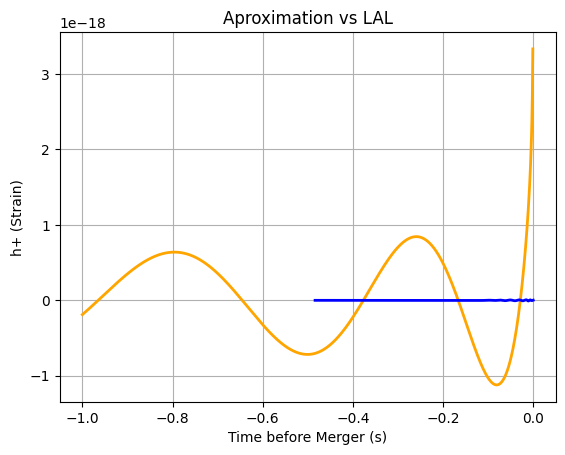

In [191]:
plt.plot(t_values, h_values, linewidth=2, color='orange', label='Theoretical')
plt.plot(data['time'].values[data['time'].values<0],data['h_+'].values[data['time'].values<0], label='h_+', color='blue', linewidth=2)
plt.xlabel("Time before Merger (s)")
plt.ylabel("h+ (Strain)")
plt.title("Aproximation vs LAL")
plt.grid()